# CNN Parts of Speech Over Time

Kevin Nolasco

Cabrini University

MCIS565 - Natural Language Processing

05/13/2022

In [1]:
from clean_articles import DataManager
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette = 'deep')
import numpy as np
import pandas as pd
import nltk
pd.options.mode.chained_assignment = None

In [2]:
manager = DataManager()
manager.load_data()
manager.data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [3]:
manager.extract_year()
manager.data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,Year
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",2021
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,2021
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...,2022
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...,2022


In [4]:
manager.clean_article_text()
manager.data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,Year,article_text_clean
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",2021,"[right, now, theres, a, shortage, of, truck, d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,2021,"[working, in, a, factory, or, warehouse, can, ..."
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021,"[in, a, hong, kong, warehouse, a, swarm, of, a..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...,2022,"[the, pandemic, thrust, the, working, world, i..."
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...,2022,"[new, york, businessmarch, madness, isnt, just..."


In [5]:
manager.filter_cols()
manager.data.head()

,Headline,Category,Article text,Year,article_text_clean
0,"There's a shortage of truckers, but TuSimple t...",news,"(CNN)Right now, there's a shortage of truck d...",2021,"[right, now, theres, a, shortage, of, truck, d..."
1,Bioservo's robotic 'Ironhand' could protect fa...,news,(CNN)Working in a factory or warehouse can me...,2021,"[working, in, a, factory, or, warehouse, can, ..."
2,This swarm of robots gets smarter the more it ...,news,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021,"[in, a, hong, kong, warehouse, a, swarm, of, a..."
3,"Two years later, remote work has changed milli...",business,The pandemic thrust the working world into a n...,2022,"[the, pandemic, thrust, the, working, world, i..."
4,Why March is so volatile for stocks - CNN,business,New York (CNN Business)March Madness isn't jus...,2022,"[new, york, businessmarch, madness, isnt, just..."


## Simple EDA

Let's do a simple EDA of the dataset.
1. [How many categories do we have?](#categories) What is the volume of each?
2. [How many words on average per category?](#words_per_category)
3. [How many years of articles do we have?](#volume_per_year) What is the volume per year?

<a id = 'categories'></a>
### How many categories?

In [6]:
# function for setting up plots
def make_fig(rows = 1, cols = 1):
    fig, axs = plt.subplots(rows, cols)
    fig.set_size_inches(10,10)
    return fig, axs

def clean_plot(fig, axs, g, title):
    """
    remove ticks, add title, add counts above bars, remove grid lines
    """
    plt.tick_params(left = False, bottom = False , labelleft = False)
    g.set(xlabel = None, ylabel = None, title = title)
    g.bar_label(g.containers[0], labels = ['{:,.0f}'.format(val) for val in g.containers[0].datavalues])
    axs.grid(False)
    

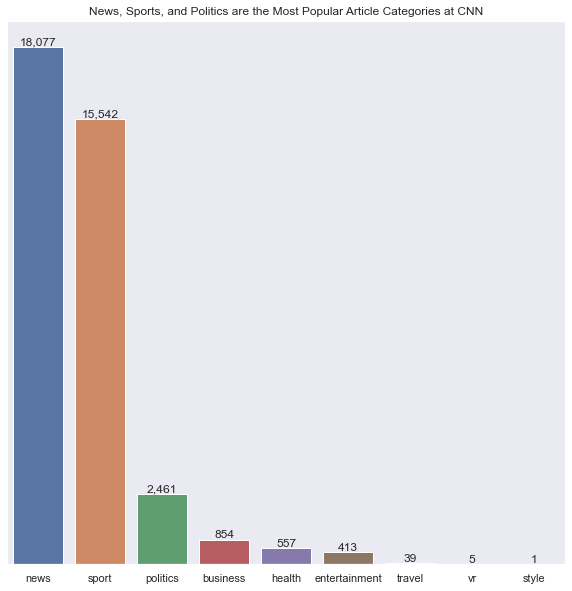

In [7]:
fig, axs = make_fig()
g = sns.countplot(data = manager.data, x = 'Category', order = manager.data['Category'].value_counts().index)
clean_plot(fig, axs, g, 'News, Sports, and Politics are the Most Popular Article Categories at CNN')
plt.show()

From the above, we can see that News, Sports, and Politics are the most popular article types in this dataset. Style, VR, and Travel have very low article counts, so I will drop these from the set.

In [8]:
manager.data = manager.data[~manager.data['Category'].isin(['travel','vr','style'])]
manager.data['Category'].value_counts()

news             18077
sport            15542
politics          2461
business           854
health             557
entertainment      413
Name: Category, dtype: int64

<a id = 'words_per_category'></a>
### Words per Category

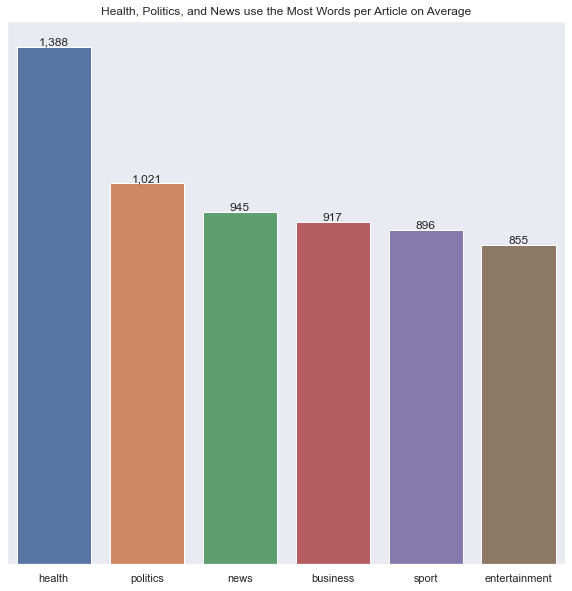

In [9]:
# find number of words
manager.data['n_words'] = manager.data['article_text_clean'].apply(lambda x: len(x))
grouped_cats = manager.data.groupby('Category')['n_words'].mean().reset_index(name = 'avg_words')

fig, axs = make_fig()
g = sns.barplot(data = grouped_cats, x = 'Category', y = 'avg_words', order = grouped_cats.sort_values(by = 'avg_words', ascending = False)['Category'])
clean_plot(fig, axs, g, 'Health, Politics, and News use the Most Words per Article on Average')
plt.show()

From above, we can see that most articles on average have about 1,000 words. The health category has the most words on average with up to 1,400 words per article.

<a id = 'volume_per_year'></a>
### Volume Per Year

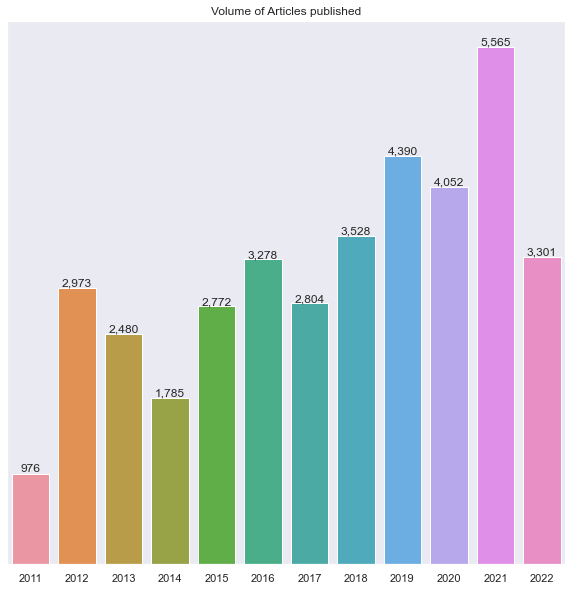

In [10]:
fig, axs = make_fig()
g = sns.countplot(data = manager.data, x = 'Year')
clean_plot(fig, axs, g, 'Volume of Articles published')
plt.show()

From above we can see that the volume of articles published has grown over time. 2022 looks like there is a drop in volume, but that's only because 2022 is not a complete year yet!

## Parts of Speech Over Time

In [11]:
manager.article_sents()
manager.data['pos_sents'] = manager.data['article_sents_clean'].apply(nltk.pos_tag_sents)